In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import imp
import matplotlib.pyplot as plt
import argparse
import six
import sys
import random

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from google.protobuf.json_format import MessageToDict, MessageToJson

In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./config/API Project-f27b92022f29.json"

In [3]:
def entity_sentiment_text(text):
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    document = types.Document(content=text.encode('utf-8'),type=enums.Document.Type.PLAIN_TEXT)

    # Detect and send native Python encoding to receive correct word offsets.
    encoding = enums.EncodingType.UTF32
    if sys.maxunicode == 65535:
        encoding = enums.EncodingType.UTF16
    #print("I am here")
    result = client.analyze_entity_sentiment(document, encoding)
    #print(result)
    json_data = MessageToJson(result)
    return json_data


In [7]:
def analyze_text(review_text,company_name):
    """Run a sentiment analysis request on text within a passed filename."""
    print("Company Name:"+str(company_name))
    client = language.LanguageServiceClient()
    content = review_text
    document = types.Document(
        content=content,
        type=enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document)
    # Return the results
    return annotations.document_sentiment.score,  annotations.document_sentiment.magnitude

In [6]:
df = pd.read_csv("./resources/glassdoor4.csv", encoding='utf-8')
print(df['cons'][0])
len(df['cons'])

Very large company which can be felt in the office atmosphere (people don't know each other)

The other interns and myself had to find housing in NYC with little notice time which was incredibly stressful.


100

In [8]:


#print("Here's the data you got:"+str(json.dumps(results, indent=2)))
    
#score_c, magnitude_c  = analyze_text(df['cons'])
#print("Score:"+str(score)+" Magnitude: "+str(magnitude))

df['cons_score'] = df.apply(lambda row: analyze_text(row['cons'],row['name'])[0], axis=1)
df['cons_magnitude'] =df.apply(lambda row: analyze_text(row['cons'],row['name'])[1], axis=1)
df['pro_score'] = df.apply(lambda row: analyze_text(row['pros'],row['name'])[0], axis=1)
df['pro_magnitude'] = df.apply(lambda row: analyze_text(row['pros'],row['name'])[1], axis=1)



Company Name:IBM
Company Name:J.P. Morgan
Company Name:Citi
Company Name:Macy's
Company Name:Morgan Stanley
Company Name:Goldman Sachs
Company Name:PwC
Company Name:Deloitte
Company Name:EY
Company Name:Bloomberg L.P.
Company Name:Bank of America
Company Name:Cognizant Technology Solutions
Company Name:American Express
Company Name:Verizon
Company Name:Columbia University
Company Name:AIG
Company Name:KPMG
Company Name:NYU (New York University)
Company Name:Thomson Reuters
Company Name:New York City Department of Education
Company Name:Johnson & Johnson
Company Name:UBS
Company Name:Credit Suisse
Company Name:Barclays
Company Name:Target
Company Name:Rutgers University
Company Name:AT&T
Company Name:The Home Depot
Company Name:BNY Mellon
Company Name:Starbucks
Company Name:Deutsche Bank
Company Name:Accenture
Company Name:CVS Health
Company Name:Verizon Wireless
Company Name:NBCUniversal
Company Name:Apple
Company Name:Best Buy
Company Name:Mount Sinai Health System
Company Name:UPS
Co

Company Name:KPMG
Company Name:NYU (New York University)
Company Name:Thomson Reuters
Company Name:New York City Department of Education
Company Name:Johnson & Johnson
Company Name:UBS
Company Name:Credit Suisse
Company Name:Barclays
Company Name:Target
Company Name:Rutgers University
Company Name:AT&T
Company Name:The Home Depot
Company Name:BNY Mellon
Company Name:Starbucks
Company Name:Deutsche Bank
Company Name:Accenture
Company Name:CVS Health
Company Name:Verizon Wireless
Company Name:NBCUniversal
Company Name:Apple
Company Name:Best Buy
Company Name:Mount Sinai Health System
Company Name:UPS
Company Name:Merck
Company Name:Pfizer
Company Name:Memorial Sloan Kettering
Company Name:Prudential
Company Name:Cablevision Systems
Company Name:Bloomingdale's
Company Name:Chase
Company Name:New York Life
Company Name:ADP
Company Name:MetLife
Company Name:Ralph Lauren
Company Name:TD
Company Name:Toys "R" Us
Company Name:PepsiCo
Company Name:Staples
Company Name:Citibank
Company Name:L'Or

In [9]:
#df.to_csv("./output/employer_reviews_sentiments.csv")
df

,Unnamed: 0,cons,headline,name,pros,cons_score,cons_magnitude,pro_score,pro_magnitude
0,0,Very large company which can be felt in the of...,Software Engineer Intern,IBM,IBM rented out most of a wework office which a...,0.1,1.1,0.9,1.8
1,1,"Point system isn't enough, every year or so t...",Personal/Business Banker,J.P. Morgan,"Good networking, training in different locatio...",-0.6,0.6,0.9,0.9
2,2,"constant mergers, long hours, construction in ...",Great company but get ready to work long hours!,Citi,"Great people, work balance",0.0,0.0,0.9,0.9
3,3,long hours\r\nstanding for hours at a time (th...,Fun place to work,Macy's,Fun environment\r\nyou meet a lot of people fr...,0.0,0.0,0.9,0.9
4,4,Some of the work are not that interesting,Good Place to Start the Career,Morgan Stanley,Many opportunities and most people are friendly,-0.6,0.6,0.8,0.8
5,5,Can be intense at times and expect a lot from ...,Very good firm,Goldman Sachs,"Great people, very good culture. Great reputat...",0.0,0.3,0.8,2.5
6,6,Work life balance can be hard for all levels e...,Senior Associate,PwC,Many opportunities and diverse environment.,0.7,0.7,0.8,0.8
7,7,"Intense lifestyle, travel, long hours, rigid ...",Consultant,Deloitte,"Great firm, mentorship culture, great benefi...",0.8,0.8,0.9,1.9
8,8,Sometimes work was a bit dry,Great place to learn and grow,EY,Great company culture and people,0.3,0.3,0.9,0.9
9,9,"Too much meetings. Long hours, flexible work ...",UX,Bloomberg L.P.,Nice office environment . Career sites listin...,0.1,0.5,0.7,2.2


In [8]:

#print("Here's the data you got:"+str(json.dumps(results, indent=2)))
j = json.loads(results)
with open('output/data.json', 'w') as outfile:
     json.dump(j, outfile, sort_keys = True, indent = 4,
               ensure_ascii = False)


In [8]:
# The Natural Language API processes the given text to extract the entities and determine sentiment. 
# An Entity Sentiment Analysis request returns response 
# containing the entities that were found in the document content, a mentions entry for each time the
# entity is mentioned, and the numerical score and 
# magnitude values for each mention, as described in Interpreting sentiment analysis values. 
# The overall score and magnitude values for an entity are an 
# aggregate of the specific score and magnitude values for each mention of the entity. 
# The score and magnitude values for an entity can be 0, if there was 
# low sentiment in the text, resulting in a magnitude of 0, or the sentiment is mixed, resulting in a score of 0.
# Clearly Positive*	"score": 0.8, "magnitude": 3.0
# Clearly Negative*	"score": -0.6, "magnitude": 4.0
# Neutral	"score": 0.1, "magnitude": 0.0
# Mixed	"score": 0.0, "magnitude": 4.0
#Interpreting sentiment analysis values

# The score of a document's sentiment indicates the overall emotion of a document. 
# The magnitude of a document's sentiment indicates how much emotional content is present within the document,
#and this value is often proportional to the length of the document

In [26]:
# Choose 3 entities to determine favorability of the company
#Company reputation and work culture
work_culture = ['job',  'company', 'firm','organization','office atmosphere', 'office', 'management', 'culture', 'people','business']
work_life_balance = ['travel',  'hour', 'schedule','task','atmosphere', 'office', 'lifestye','work/life', 'workload','environment']
work_pay = ['salary', 'benefit', 'holiday', 'advance', 'training','bonus', '401k','vacation', 'compensation', 'Test']
company_feedback = work_culture + work_life_balance + work_pay 
# My Logic 
# For each category look for these words in Pros/Cons for each category
# Then Estimate average score for each category for each firm review


In [27]:
print(str(len(company_feedback)))

30


In [30]:
def analyze_ratings(text,company_name):
    #print("starting Analyze"+text)
    
    result = entity_sentiment_text(text)
    rnd=random.randint(1,101)
    j = json.loads(result)
    with open('output/Sentiment_'+str(company_name)+str(rnd)+'.json', 'w+') as outfile:
        json.dump(j, outfile, sort_keys = True, indent = 4, ensure_ascii = False)
    #print("Processing Company:"+str(company_name))
    ratings = []
    i=0
    j_list = j["entities"]
    #print(jcons_list)
    for i in range(len(j_list)):
        #print(str(i))
        name_str=j_list[i]["name"]
        if name_str in company_feedback:
            #print(name_str)
            sentiment = j_list[i]["sentiment"]
            if sentiment:
                try:
                    #print ("Found keyword:"+str(name_str)+"Value"+str(sentiment["magnitude"]))
                    #print ("Found keyword:"+str(name_str)+"Value"+str(sentiment["score"]))
                    magnitude = sentiment["magnitude"]
                    score = sentiment["score"]
                    # Clearly Positive*	"score": 0.8, "magnitude": 3.0
                    # Clearly Negative*	"score": -0.6, "magnitude": 4.0
                    # Neutral	"score": 0.1, "magnitude": 0.0
                    # Mixed	"score": 0.0, "magnitude": 4.0
                    if score > 0.8 and magnitude > 0.8:
                        ratings.append("A")
                    if score < -0.6 and magnitude > 4.0:
                        ratings.append("C")
                    #if ( (score == 0.0 and magnitude >= 4.0 ) or ( score == 0.1 and magnitude >= 4.0) ):
                    else:
                        ratings.append("B")
                except:
                    #print("Error in parsing:"+text)
                    continue
        i=i+1
    #Now rate the pros
    #print ( ratings )
    return ratings
    

In [31]:
print (analyze_ratings(df['pros'][0],df['name'][0]))

['B']


In [16]:
df1 = pd.DataFrame(df)
df1

,Unnamed: 0,cons,headline,name,pros,cons_score,cons_magnitude,pro_score,pro_magnitude
0,0,Very large company which can be felt in the of...,Software Engineer Intern,IBM,IBM rented out most of a wework office which a...,0.1,1.1,0.9,1.8
1,1,"Point system isn't enough, every year or so t...",Personal/Business Banker,J.P. Morgan,"Good networking, training in different locatio...",-0.6,0.6,0.9,0.9
2,2,"constant mergers, long hours, construction in ...",Great company but get ready to work long hours!,Citi,"Great people, work balance",0.0,0.0,0.9,0.9
3,3,long hours\r\nstanding for hours at a time (th...,Fun place to work,Macy's,Fun environment\r\nyou meet a lot of people fr...,0.0,0.0,0.9,0.9
4,4,Some of the work are not that interesting,Good Place to Start the Career,Morgan Stanley,Many opportunities and most people are friendly,-0.6,0.6,0.8,0.8
5,5,Can be intense at times and expect a lot from ...,Very good firm,Goldman Sachs,"Great people, very good culture. Great reputat...",0.0,0.3,0.8,2.5
6,6,Work life balance can be hard for all levels e...,Senior Associate,PwC,Many opportunities and diverse environment.,0.7,0.7,0.8,0.8
7,7,"Intense lifestyle, travel, long hours, rigid ...",Consultant,Deloitte,"Great firm, mentorship culture, great benefi...",0.8,0.8,0.9,1.9
8,8,Sometimes work was a bit dry,Great place to learn and grow,EY,Great company culture and people,0.3,0.3,0.9,0.9
9,9,"Too much meetings. Long hours, flexible work ...",UX,Bloomberg L.P.,Nice office environment . Career sites listin...,0.1,0.5,0.7,2.2


In [34]:
df1['pros_rating']=''
df1['cons_rating']=''

df1.head()

,Unnamed: 0,cons,headline,name,pros,cons_score,cons_magnitude,pro_score,pro_magnitude,pros_rating,cons_rating,combined_rating
0,0,Very large company which can be felt in the of...,Software Engineer Intern,IBM,IBM rented out most of a wework office which a...,0.1,1.1,0.9,1.8,,,Good
1,1,"Point system isn't enough, every year or so t...",Personal/Business Banker,J.P. Morgan,"Good networking, training in different locatio...",-0.6,0.6,0.9,0.9,,,Good
2,2,"constant mergers, long hours, construction in ...",Great company but get ready to work long hours!,Citi,"Great people, work balance",0.0,0.0,0.9,0.9,,,Good
3,3,long hours\r\nstanding for hours at a time (th...,Fun place to work,Macy's,Fun environment\r\nyou meet a lot of people fr...,0.0,0.0,0.9,0.9,,,Good
4,4,Some of the work are not that interesting,Good Place to Start the Career,Morgan Stanley,Many opportunities and most people are friendly,-0.6,0.6,0.8,0.8,,,Good


In [35]:

for index, row in df1.iterrows():
#     print(index)
    try:
#         print(row['pros'])
#         print(row['name'])
        pros = row['pros']
        cons = row['cons']
        name = row['name']
        result_pros = analyze_ratings(pros, name)
        result_cons = analyze_ratings(cons, name)
        df1.set_value(index, 'pros_rating', result_pros)
        df1.set_value(index, 'cons_rating', result_cons)
    except Exception as e:
        print(e)
        df1.set_value(index, 'pros_rating', 'N')
        df1.set_value(index, 'cons_rating', 'N')
#       
#         df1['cons_rating']='N'   

'entities'
'entities'
'entities'
'entities'
[Errno 22] Invalid argument: 'output/Sentiment_Toys "R" Us2.json'
'entities'
'entities'
'entities'
'entities'


In [36]:
df1

,Unnamed: 0,cons,headline,name,pros,cons_score,cons_magnitude,pro_score,pro_magnitude,pros_rating,cons_rating,combined_rating
0,0,Very large company which can be felt in the of...,Software Engineer Intern,IBM,IBM rented out most of a wework office which a...,0.1,1.1,0.9,1.8,[B],[B],Good
1,1,"Point system isn't enough, every year or so t...",Personal/Business Banker,J.P. Morgan,"Good networking, training in different locatio...",-0.6,0.6,0.9,0.9,[B],[],Good
2,2,"constant mergers, long hours, construction in ...",Great company but get ready to work long hours!,Citi,"Great people, work balance",0.0,0.0,0.9,0.9,"[A, B]",[],Good
3,3,long hours\r\nstanding for hours at a time (th...,Fun place to work,Macy's,Fun environment\r\nyou meet a lot of people fr...,0.0,0.0,0.9,0.9,"[A, B]",[],Good
4,4,Some of the work are not that interesting,Good Place to Start the Career,Morgan Stanley,Many opportunities and most people are friendly,-0.6,0.6,0.8,0.8,"[A, B]",[],Good
5,5,Can be intense at times and expect a lot from ...,Very good firm,Goldman Sachs,"Great people, very good culture. Great reputat...",0.0,0.3,0.8,2.5,"[A, B, A, B]",[],Excellent
6,6,Work life balance can be hard for all levels e...,Senior Associate,PwC,Many opportunities and diverse environment.,0.7,0.7,0.8,0.8,"[A, B]",[],Excellent
7,7,"Intense lifestyle, travel, long hours, rigid ...",Consultant,Deloitte,"Great firm, mentorship culture, great benefi...",0.8,0.8,0.9,1.9,"[A, B]",[],Excellent
8,8,Sometimes work was a bit dry,Great place to learn and grow,EY,Great company culture and people,0.3,0.3,0.9,0.9,[B],[],Good
9,9,"Too much meetings. Long hours, flexible work ...",UX,Bloomberg L.P.,Nice office environment . Career sites listin...,0.1,0.5,0.7,2.2,[],[B],Good


In [21]:
def merge_ratings(pro_score, pro_magnitude,cons_score, cons_magnitude, pros_rating, cons_rating):
    #First check abs(Pros_sentiment*Magnitude > Cons_sentiment*Magnitude) > 1 Positive B
    #if abs(Pros_sentiment*Magnitude - Cons_sentiment*Magnitude) < 0.5 Neutral 
    # if abc(Cons_sentiment*Magnitude > Pros_sentiment*Magnitude) > 1 ) C
    combined_rating = 'Neutral'
    if pro_score*pro_magnitude + cons_score*cons_magnitude >  1:
        combined_rating = 'Good'
    if cons_score*cons_magnitude  + pro_score*pro_magnitude < -1:
        combined_rating = 'Poor'
    if abs(pro_score*pro_magnitude + cons_score*cons_magnitude) < 0.5:
        combined_rating = 'Neutral'
    
    if ((combined_rating == 'Good') and ( 'A' in  pros_rating )):
        combined_rating = 'Excellent'
    if ((combined_rating == 'Neutral') and ( 'C' in  cons_rating )):
        combined_rating = 'Poor'
    if ((combined_rating == 'Neutral') and ( 'B' in  pros_rating or 'A' in  pros_rating )):
        combined_rating = 'Good'    
       
    return combined_rating

In [208]:
#Test Function
merge_ratings(0.8,0.8,0.6,0.6,[],[])

'Neutral'

In [37]:
df1['combined_rating'] = df1.apply(lambda row: merge_ratings(row['pro_score'],row['pro_magnitude'],row['cons_score'],row['cons_magnitude'],row['pros_rating'],row['cons_rating']), axis=1)
 

In [38]:
df1

,Unnamed: 0,cons,headline,name,pros,cons_score,cons_magnitude,pro_score,pro_magnitude,pros_rating,cons_rating,combined_rating
0,0,Very large company which can be felt in the of...,Software Engineer Intern,IBM,IBM rented out most of a wework office which a...,0.1,1.1,0.9,1.8,[B],[B],Good
1,1,"Point system isn't enough, every year or so t...",Personal/Business Banker,J.P. Morgan,"Good networking, training in different locatio...",-0.6,0.6,0.9,0.9,[B],[],Good
2,2,"constant mergers, long hours, construction in ...",Great company but get ready to work long hours!,Citi,"Great people, work balance",0.0,0.0,0.9,0.9,"[A, B]",[],Good
3,3,long hours\r\nstanding for hours at a time (th...,Fun place to work,Macy's,Fun environment\r\nyou meet a lot of people fr...,0.0,0.0,0.9,0.9,"[A, B]",[],Good
4,4,Some of the work are not that interesting,Good Place to Start the Career,Morgan Stanley,Many opportunities and most people are friendly,-0.6,0.6,0.8,0.8,"[A, B]",[],Good
5,5,Can be intense at times and expect a lot from ...,Very good firm,Goldman Sachs,"Great people, very good culture. Great reputat...",0.0,0.3,0.8,2.5,"[A, B, A, B]",[],Excellent
6,6,Work life balance can be hard for all levels e...,Senior Associate,PwC,Many opportunities and diverse environment.,0.7,0.7,0.8,0.8,"[A, B]",[],Excellent
7,7,"Intense lifestyle, travel, long hours, rigid ...",Consultant,Deloitte,"Great firm, mentorship culture, great benefi...",0.8,0.8,0.9,1.9,"[A, B]",[],Excellent
8,8,Sometimes work was a bit dry,Great place to learn and grow,EY,Great company culture and people,0.3,0.3,0.9,0.9,[B],[],Good
9,9,"Too much meetings. Long hours, flexible work ...",UX,Bloomberg L.P.,Nice office environment . Career sites listin...,0.1,0.5,0.7,2.2,[],[B],Good


In [24]:
df1.to_csv("./output/glassdoor_review_result.csv", encoding='utf-8')

In [54]:
json_file = open("./output/entity_sentiments/Sentiment_Abercrombie & Fitch89.json")
j = json.load(json_file)

#print("Here's the data you got:"+str(json.dumps(json_data, indent=2)))
#print("---")
i=0
keywords = []
j_list = j["entities"]
    #print(jcons_list)
for i in range(len(j_list)):
    try:
        name = j_list[i]["name"]
        salience = j_list[i]["salience"]
        sentiment = j_list[i]["sentiment"]
        magnitude = 0.0
        score = 0.0
        if sentiment:
            try:
                magnitude = sentiment["magnitude"]
                score = sentiment["score"]
            except:
                continue
        entities = {"name": name, "salience": salience, "magnitude": magnitude, "score": score }
        keywords.append(entities)
    except:
        continue
    i=i+1
print(keywords)    
df_keys = pd.DataFrame(keywords)

[{'name': 'Peoples', 'salience': 0.5732772946357727, 'magnitude': 0.0, 'score': 0.0}, {'name': 'perception', 'salience': 0.28245049715042114, 'magnitude': 0.0, 'score': 0.0}, {'name': 'store', 'salience': 0.14427219331264496, 'magnitude': 0.0, 'score': 0.0}]


In [55]:
df_keys

,magnitude,name,salience,score
0,0.0,Peoples,0.573277,0.0
1,0.0,perception,0.282450,0.0
2,0.0,store,0.144272,0.0


In [59]:
directory="./output/entity_sentiments/"
keywords = []
for filename in os.listdir(directory):
    if filename.endswith(".json"): 
        filename = os.path.join(directory, filename)
        json_file = open(filename)
        j = json.load(json_file)
        i=0
        try:
            j_list = j["entities"]
            #print(jcons_list)
            for i in range(len(j_list)):
                #print(str(i))
                name = j_list[i]["name"]
                salience = j_list[i]["salience"]
                sentiment = j_list[i]["sentiment"]
                magnitude = 0.0
                score = 0.0
                if sentiment:
                    try:
                        magnitude = sentiment["magnitude"]
                        score = sentiment["score"]
                    except:
                        continue
                #print(keywords)    
                else:
                    continue
                entities = {"name": name, "salience": salience, "magnitude": magnitude, "score": score }
                keywords.append(entities)    
                i=i+1
        except:
            continue
df_allkeys = pd.DataFrame(keywords)

In [61]:
df_allkeys
df_allkeys.to_csv("./output/glassdoor_review_analysis.csv", encoding='utf-8')

In [67]:
df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score < 0.0)]

,magnitude,name,salience,score
12,0.7,raises,0.631426,-0.7
14,0.9,technology,0.512045,-0.9
41,0.9,Retail life,0.591632,-0.9
78,0.4,micromanaging,0.671496,-0.4
99,0.9,growth rate,0.559055,-0.9
102,0.9,communication,0.617247,-0.9
129,0.1,work,1.000000,-0.1
130,0.9,Management,0.956515,-0.9
173,0.1,work schedule,0.503394,-0.1
192,0.6,program,1.000000,-0.6


In [69]:
df_allkeys.loc[(df_allkeys.salience > 0.9 ) & (df_allkeys.score > 0.0)]

,magnitude,name,salience,score
0,0.5,Scheduling,0.929853,0.2
11,0.9,culture,1.000000,0.9
35,0.9,thing,0.944105,0.9
77,1.0,Free Ice Cream,1.000000,0.5
120,1.1,Nice People,1.000000,0.5
144,0.9,union,1.000000,0.9
171,0.9,people,1.000000,0.9
199,0.2,None,1.000000,0.2
261,0.3,summer internship,1.000000,0.1
268,1.9,campus,1.000000,0.9


In [126]:
data = df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score > 0.0)]['score']
x_axis = df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score > 0.0)]['salience']*25
sp = df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score > 0.0)]['magnitude']*10

#labels = df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score > 0.0)]['name']
df_allkeys.loc[(df_allkeys.salience > 0.7 ) & (df_allkeys.score > 0.9)]['name']


Series([], Name: name, dtype: object)

In [130]:
data1 = df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score < 0.0)]['score']
x_axis1 = df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score < 0.0)]['salience']*25
sn = df_allkeys.loc[(df_allkeys.salience > 0.5 ) & (df_allkeys.score > 0.0)]['magnitude']*25

In [131]:
labels

Series([], Name: name, dtype: object)

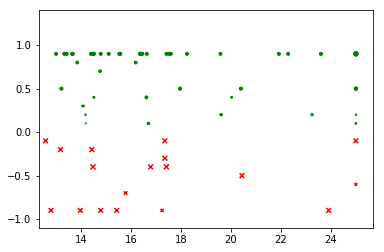

In [132]:
plt.scatter(x_axis, data, marker="o", facecolors="green", edgecolors="green",
            s=sp, alpha=1.0)
plt.scatter(x_axis1, data1, marker="x", facecolors="red", edgecolors="red",
            s=sn, alpha=1.0)
for i in range(0,len(labels)):
    xy=(x_axis[i],data[i])
    plt.annotate(labels[i],xy)

plt.ylim(np.min(data1)-0.2, np.max(data)+0.5)
plt.xlim(np.min(x_axis)-0.7, np.max(x_axis)+0.7)
plt.show()